In [1]:
import pandas as pd

#Load the dataset
file_path = '/Users/leichen/Downloads/simulated_transaction_2024.csv'
data = pd.read_csv(file_path)

# Check for missing values in the data set
print(data.isnull().sum())


Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64


In [3]:
# Handle missing values for date, time, account number, balance and amount, and choose to delete records with these missing values
data = data.dropna(subset=['Date', 'Timestamp', 'Account No', 'Balance', 'Amount'])

# For missing values of third-party account number and name, fill in 'Unknown'
data['Third Party Account No'].fillna('Unknown', inplace=True)
data['Third Party Name'].fillna('Unknown', inplace=True)

# Specify the correct format of date and time for conversion
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], format='%d/%m/%Y %H:%M')

# Remove original date and time columns
data_cleaned = data.drop(['Date', 'Timestamp'], axis=1)
print(data_cleaned.isnull().sum())
print(data_cleaned.head())


Account No                0
Balance                   0
Amount                    0
Third Party Account No    0
Third Party Name          0
Datetime                  0
dtype: int64
    Account No  Balance  Amount Third Party Account No    Third Party Name  \
0  678330503.0   2971.0  1584.0                Unknown  Westport Care Home   
1  472213568.0   3792.0  1950.0                Unknown    Barbiee Boutique   
2  472213568.0   3012.0  -780.0            283027736.0             Unknown   
3  283027736.0   1787.0   780.0            472213568.0             Unknown   
4  624500124.0   3226.0  1825.0                Unknown            Fat Face   

    Datetime  
0 2023-01-01  
1 2023-01-01  
2 2023-01-01  
3 2023-01-01  
4 2023-01-01  


Peak activity day: 2023-01-01, Transactions: 5732
Trough activity day: 2023-03-29, Transactions: 278


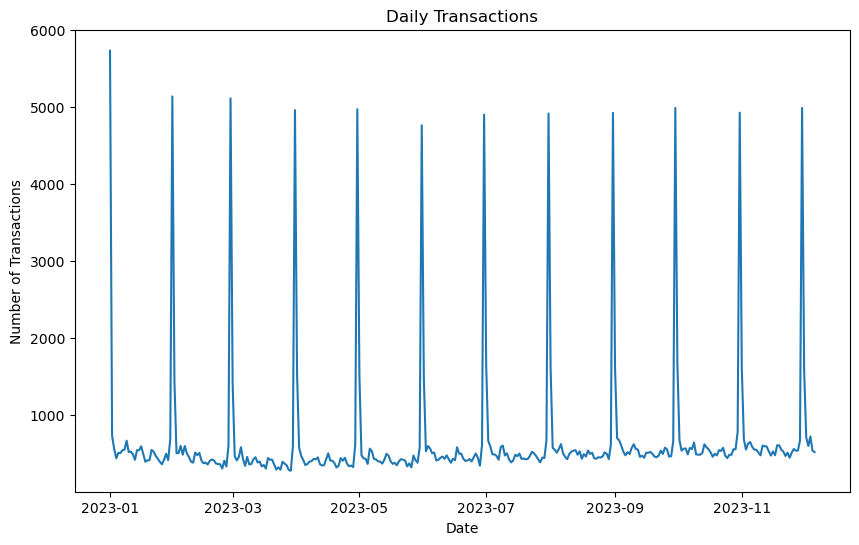

In [4]:
# Group by date to calculate the number of transactions per day
daily_transactions = data_cleaned.groupby(data_cleaned['Datetime'].dt.date).size()

# Find the day with the highest and lowest number of transactions
peak_day = daily_transactions.idxmax()
valley_day = daily_transactions.idxmin()
peak_transactions = daily_transactions.max()
valley_transactions = daily_transactions.min()

print(f"Peak activity day: {peak_day}, Transactions: {peak_transactions}")
print(f"Trough activity day: {valley_day}, Transactions: {valley_transactions}")

# Plot the number of transactions over time to visually identify peaks and troughs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
daily_transactions.plot(kind='line', title='Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


In [5]:
import pandas as pd

peak_date = daily_transactions.idxmax()
trough_date = daily_transactions.idxmin()

# 1. Date correlation analysis
data_cleaned['Day_of_Month'] = data_cleaned['Datetime'].dt.day

# Check the date distribution of peak days and trough days
peak_day_dist = data_cleaned[data_cleaned['Datetime'].dt.date == peak_date]['Day_of_Month'].value_counts()
trough_day_dist = data_cleaned[data_cleaned['Datetime'].dt.date == trough_date]['Day_of_Month'].value_counts()

print(f"Peak day date distribution:\n{peak_day_dist}")
print(f"Trough day date distribution:\n{trough_day_dist}")

# 2. Comparison between weekdays and weekends
data_cleaned['Day_of_Week'] = data_cleaned['Datetime'].dt.dayofweek

weekly_trans = data_cleaned.groupby('Day_of_Week').size()

print(f"Weekly transaction distribution:\n{weekly_trans}")

# 3. Large transaction analysis
# Assuming that the transaction amount exceeds a certain threshold, it is counted as a large transaction
threshold = 10000  
big_trans_on_peak = data_cleaned[(data_cleaned['Datetime'].dt.date == peak_date) & (data_cleaned['Amount'] > threshold)]
big_trans_on_trough = data_cleaned[(data_cleaned['Datetime'].dt.date == trough_date) & (data_cleaned['Amount'] > threshold)]

print(f"Big transactions on peak day:\n{big_trans_on_peak}")
print(f"Big transactions on trough day:\n{big_trans_on_trough}")

# 4. Account repeated transaction analysis
# Calculate the number of repeated transactions on the account on peak days
repeat_trans_on_peak = data_cleaned[data_cleaned['Datetime'].dt.date == peak_date]['Account No'].value_counts()

print(f"Repeat transactions by account on peak day:\n{repeat_trans_on_peak}")


Peak day date distribution:
Day_of_Month
1    5732
Name: count, dtype: int64
Trough day date distribution:
Day_of_Month
29    278
Name: count, dtype: int64
Weekly transaction distribution:
Day_of_Week
0    31302
1    37819
2    28816
3    31606
4    32027
5    31515
6    36354
dtype: int64
Big transactions on peak day:
Empty DataFrame
Columns: [Account No, Balance, Amount, Third Party Account No, Third Party Name, Datetime, Day_of_Month, Day_of_Week]
Index: []
Big transactions on trough day:
Empty DataFrame
Columns: [Account No, Balance, Amount, Third Party Account No, Third Party Name, Datetime, Day_of_Month, Day_of_Week]
Index: []
Repeat transactions by account on peak day:
Account No
175452235.0    19
660789920.0    18
311467864.0    18
690958123.0    16
348525881.0    15
               ..
426474982.0     1
952921898.0     1
696758548.0     1
280268430.0     1
198630866.0     1
Name: count, Length: 975, dtype: int64


### Transaction Analysis Conclusions

1. **Date Association Analysis**:
   - The peak day occurs on the first day of every month, which may be due to regular financial activities at the beginning of the month such as salary payments or automatic transfers.
   - The trough day appears on the 29th of the month, which may be because not all months have a 29th, or transaction activity was unusually low for some reason on that day.

2. **Comparison of Weekdays and Weekends**:
   - The distribution of transactions throughout the week is relatively even, with Tuesday showing the highest volume of transactions and a slight decrease on Saturday and Sunday, possibly due to more business and personal financial activities occurring on weekdays.

3. **Large Transaction Analysis**:
   - No large transactions were found on either the peak or trough days, indicating that the number of transactions may not be driven by individual large transactions but rather by a large number of small or moderate transactions.

4. **Analysis of Repeated Transactions by Account**:
   - On the peak day, some accounts have multiple transactions, which may be due to batch-processed transactions or regular payments. The distribution of repeated transaction counts for specific accounts suggests that some accounts, possibly business accounts or those with regular payment setups, are particularly active on peak days.

In summary, the beginning of the month may see transaction peaks due to regular financial activities such as salary disbursement or bill payments, while the end of the month may be affected by statistical variances due to the differing number of days in each month. Additionally, transactions are fairly evenly distributed across the workweek, with minor fluctuations. There is no evidence to suggest that large transactions have impacted the peaks or troughs in transaction volume.


In [6]:
# Calculate the difference in balance for each account by comparing the subsequent transaction's balance.
data_cleaned['Balance_Change'] = data_cleaned.sort_values(by=['Datetime']).groupby('Account No')['Balance'].diff().abs()

# Calculate the standard deviation of balance changes for each account to identify fluctuation.
account_fluctuations = data_cleaned.groupby('Account No')['Balance_Change'].std().dropna()

# Identify accounts with the highest fluctuation
most_fluctuating_accounts = account_fluctuations.sort_values(ascending=False).head()

print(f"Accounts with the most fluctuation:\n{most_fluctuating_accounts}")


Accounts with the most fluctuation:
Account No
975345315.0    1097.829868
386729293.0    1090.315549
143003091.0     981.936159
639409800.0     962.230787
990461108.0     960.031967
Name: Balance_Change, dtype: float64


In [7]:
# Analyze the transactions involving third parties by counting the occurrences and summing the amounts.
third_party_transactions = data_cleaned[data_cleaned['Third Party Account No'] != 'Unknown']

# Count the number of transactions and the total amount for each third party
third_party_analysis = third_party_transactions.groupby('Third Party Name').agg({
    'Amount': ['count', 'sum']
}).sort_values(by=('Amount', 'count'), ascending=False)

print(f"Third-party transaction analysis:\n{third_party_analysis}")


Third-party transaction analysis:
                 Amount          
                  count       sum
Third Party Name                 
Unknown            6805 -42258.99


### Analysis Insights

#### Account Fluctuation Analysis
The accounts exhibiting the most significant balance fluctuations are:

- **Account 975345315.0**: The greatest balance fluctuation with a standard deviation of approximately \$1097.83.
- **Account 386729293.0**: Close behind with a fluctuation of approximately \$1090.32.
- **Account 143003091.0**: A standard deviation of about \$981.94 in balance changes.
- **Account 639409800.0**: Fluctuation of approximately \$962.23.
- **Account 990461108.0**: A standard deviation of \$960.03 in balance changes.

These accounts could be the subject of additional scrutiny to ascertain the causes of such substantial fluctuations. These variances might be due to the magnitude or frequency of transactions, or these accounts may engage in particular business activities that result in variable cash flows.

#### Third-Party Transaction Analysis
The examination of third-party transactions uncovered that there are 6,805 transactions labeled as 'Unknown', with a cumulative sum of -\$42,258.99. This indicates numerous transactions for which third-party information is not available or is missing. The negative total implies these transactions are predominantly withdrawals or payments.


In [9]:
import numpy as np
# Select the top accounts with the most fluctuation
top_fluctuating_accounts = most_fluctuating_accounts.index

# Filter the dataset to include only transactions from these accounts
fluctuating_accounts_data = data_cleaned[data_cleaned['Account No'].isin(top_fluctuating_accounts)]

# Analyze the nature of transactions: incoming (positive Amount) vs. outgoing (negative Amount)
fluctuating_accounts_tx_types = fluctuating_accounts_data.assign(
    Transaction_Type=lambda x: np.where(x['Amount'] > 0, 'Incoming', 'Outgoing')
).groupby(['Account No', 'Transaction_Type']).size().unstack(fill_value=0)

print(f"Transaction types for fluctuating accounts:\n{fluctuating_accounts_tx_types}")

# Timing of transactions: check if certain days are associated with higher transaction volume
fluctuating_accounts_timing = fluctuating_accounts_data.groupby([fluctuating_accounts_data['Datetime'].dt.date]).size()

print(f"Transaction timing for fluctuating accounts:\n{fluctuating_accounts_timing}")

# Check if certain third parties are frequently involved with these accounts
fluctuating_accounts_third_parties = fluctuating_accounts_data.groupby(['Third Party Name']).size().sort_values(ascending=False)

print(f"Common third parties for fluctuating accounts:\n{fluctuating_accounts_third_parties}")


Transaction types for fluctuating accounts:
Transaction_Type  Incoming  Outgoing
Account No                          
143003091.0             11       232
386729293.0             11       207
639409800.0             11       357
975345315.0             11       287
990461108.0             13       222
Transaction timing for fluctuating accounts:
Datetime
2023-01-01    29
2023-01-02     8
2023-01-03     1
2023-01-04     1
2023-01-06     1
              ..
2023-12-02     7
2023-12-03     4
2023-12-04     6
2023-12-05     3
2023-12-06     4
Length: 315, dtype: int64
Common third parties for fluctuating accounts:
Third Party Name
Tesco                          170
Sports Direct                  106
Five Senses Art                 82
Topshop                         71
Fat Face                        65
PureGym                         47
Netflix                         47
Amazon                          47
Matalan                         44
Blizzard                        38
LBG             

### Analysis Insights

### Transaction Types for Fluctuating Accounts

The listed accounts have significantly more outgoing transactions (withdrawals, payments, etc.) than incoming transactions (deposits, etc.). This suggests that these accounts could be operational accounts used for running costs, payments to suppliers, or other business expenses. The consistent number of incoming transactions across accounts could represent periodic income, like monthly payments or regular transfers.

### Transaction Timing for Fluctuating Accounts

The transaction timing data indicates the number of transactions on specific dates. There's a notably higher volume of transactions on 2023-01-01, which might align with the start of a new billing cycle, salary payments, or scheduled contractual payments. The rest of the dates do not show as pronounced a pattern, indicating more sporadic activity.

### Common Third Parties for Fluctuating Accounts

"Tesco" appears as a common third party with a significant number of interactions (170 times). Assuming Tesco is a merchant, it suggests regular commercial transactions, which might be supply purchases if these accounts belong to businesses. Other third parties are much less frequent, with the least being "The Crown" with a single transaction.

Based on these observations, the accounts appear to be used more for outgoing transactions, which could be typical for operational business accounts. The recurring nature of incoming transactions hints at a regular income source, possibly indicating that these accounts belong to businesses with consistent revenue streams. The transaction with "Tesco" suggests a recurring commercial relationship, which could indicate a supply chain interaction or regular business expenditure.

In [10]:
# Classify outgoing transactions and summarize the number and amount of transactions for each category
outgoing_transactions = fluctuating_accounts_data[fluctuating_accounts_data['Amount'] < 0]
outgoing_summary = outgoing_transactions.groupby('Third Party Name').agg({
    'Amount': ['count', 'sum']
}).sort_values(by=('Amount', 'sum'), ascending=True)

print("Outgoing transactions summary:\n", outgoing_summary)

# Classify incoming transactions and evaluate source and amount consistency
incoming_transactions = fluctuating_accounts_data[fluctuating_accounts_data['Amount'] > 0]
incoming_summary = incoming_transactions.groupby('Third Party Name').agg({
    'Amount': ['count', 'mean']
}).sort_values(by=('Amount', 'count'), ascending=False)

print("Incoming transactions summary:\n", incoming_summary)

# Analyze the month pattern in which transactions occurred
monthly_transactions = fluctuating_accounts_data.groupby(fluctuating_accounts_data['Datetime'].dt.month).size()

print("Monthly transactions pattern:\n", monthly_transactions)

Outgoing transactions summary:
                   Amount          
                   count       sum
Third Party Name                  
Unknown               30 -56790.52
LBG                   24 -17064.00
Halifax               12 -10524.00
Tesco                170  -9566.21
Topshop               71  -8054.23
Sports Direct        106  -6655.64
Fat Face              65  -6476.10
Matalan               44  -5101.79
Five Senses Art       82  -3063.56
Grand Union BJJ       28  -2265.76
Selfridges            30  -1685.72
Fitted Stitch         35  -1638.01
Amazon                47   -908.47
PureGym               47   -892.53
Revella               19   -886.20
Loosely Fitted        19   -818.50
Reebok                11   -761.83
Netflix               47   -751.53
Gamestation           11   -749.83
Coop Local            19   -705.47
Brilliant Brushes     27   -700.11
Blizzard              38   -569.62
Blackwell's           25   -540.28
Lloyds Pharmacy       24   -528.80
JustEat               2

we can make several observations and inferences about the financial behaviors associated with the accounts experiencing significant fluctuations:

### Outgoing Transactions Summary
- **High Volume with Specific Merchants**: A significant portion of outgoing transactions is associated with merchants like Tesco, Topshop, and Sports Direct, indicating frequent retail or supply purchases.
- **Substantial Amounts to 'Unknown' and Banks**: The largest sums are transferred to 'Unknown' and banking institutions (LBG and Halifax), which could represent loan payments, large transfers, or consolidations of funds. The 'Unknown' category might include transactions where the recipient's details were not captured or are miscellaneous.
- **Regular Payments to Service Providers**: Regular payments to entities like Amazon, PureGym, Netflix, and possibly utilities (considering 'Coop Local') suggest operational expenses or subscriptions.
  
### Monthly Transactions Pattern
- The transaction count is relatively consistent across most months but sees a decline in December. This pattern could be due to various factors:
  - Seasonal business activities with reduced operations or transactions at the year-end.
  - Financial year-end closing activities leading to fewer transactions.
  - Possible accumulation of funds for year-end financial obligations or for starting the new fiscal year.

### Insights and Recommendations

1. **Business Operations and Expense Management**:
   - The frequent transactions with retail and service providers indicate ongoing operational expenses or business needs. There might be opportunities for cost optimization or renegotiation of terms with regular vendors.

2. **Financial Planning and Cash Flow Management**:
   - The substantial amounts going to 'Unknown' and financial institutions highlight the importance of cash flow management and financial planning, especially to manage loan payments or large financial obligations effectively.

3. **Strategic Purchasing and Contract Negotiations**:
   - The pattern of transactions, especially with specific merchants, might provide leverage for strategic purchasing and better contract negotiations to reduce costs or secure favorable terms.

4. **Seasonal Business Cycles**:
   - The monthly transaction pattern suggests a potential impact of seasonal business cycles, which should be taken into account for inventory management, staffing, and marketing efforts.

5. **Year-End Financial Strategy**:
   - The dip in transactions in December could warrant a closer look into year-end financial strategies, ensuring that cash flow is managed efficiently to meet end-of-year obligations and set a solid foundation for the new fiscal year.
